In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
import sklearn.metrics as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.drop('Id',axis = 1,inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.sample(n = 25)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
27,5.2,3.5,1.5,0.2,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica


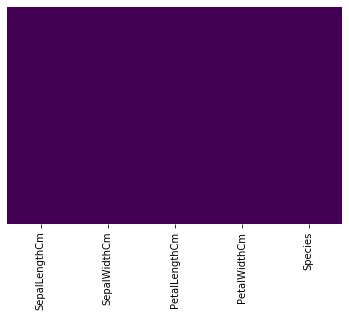

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False);

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


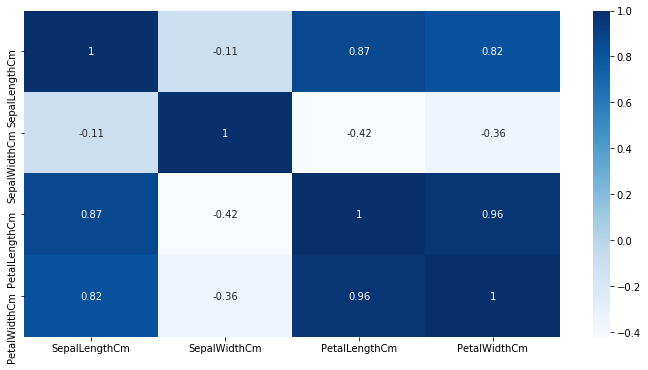

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

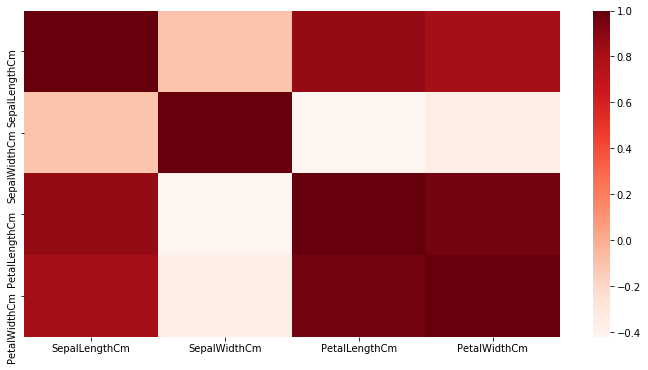

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=False,cmap='Reds');

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


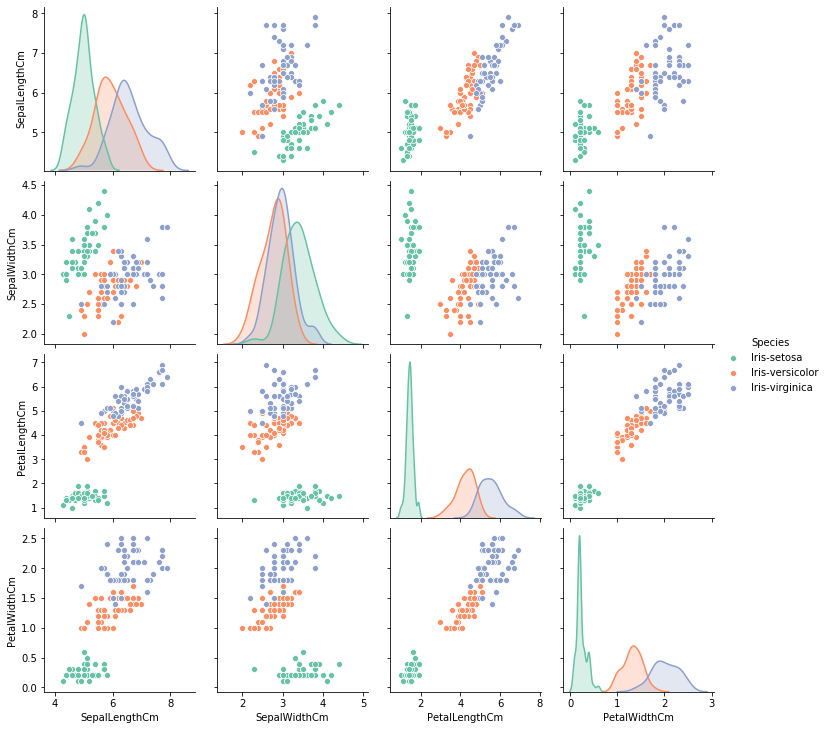

In [15]:
sns.pairplot(data=df,hue="Species",palette="Set2")
plt.show()

In [16]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [17]:
kmeans = KMeans(n_clusters=100)

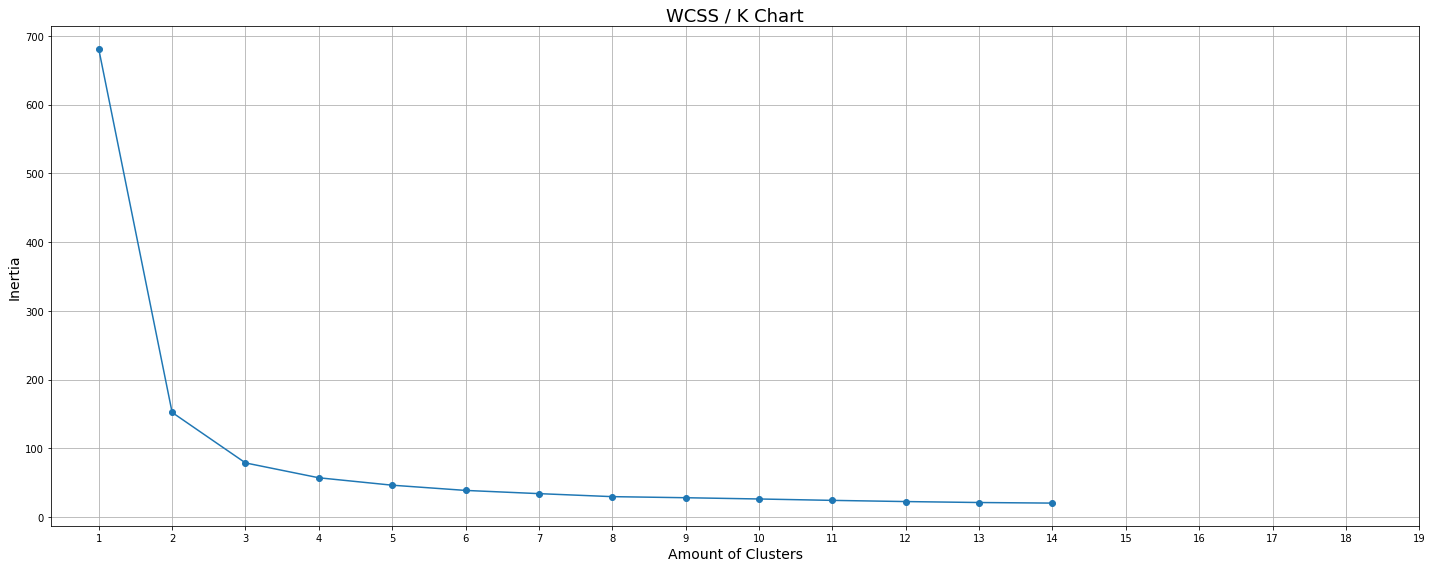

In [18]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

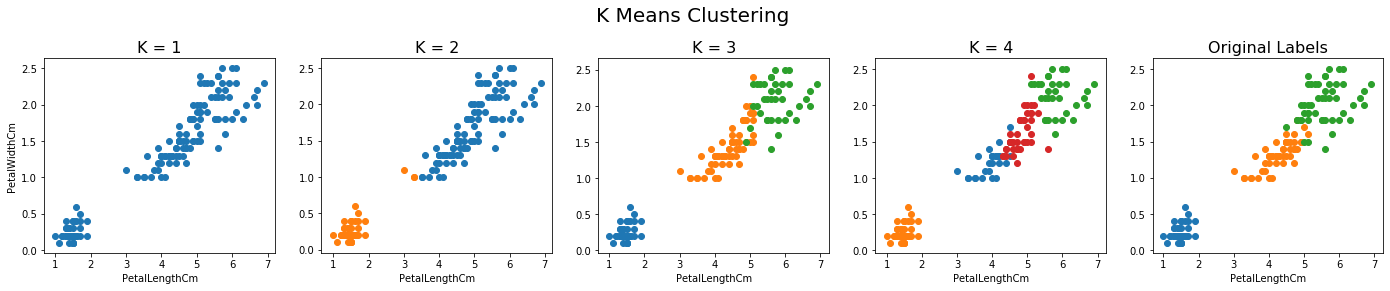

In [19]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])


features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])


features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])


features.drop(["labels"],axis=1,inplace=True)


plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

In [20]:
hc_cluster = AgglomerativeClustering(n_clusters=100)

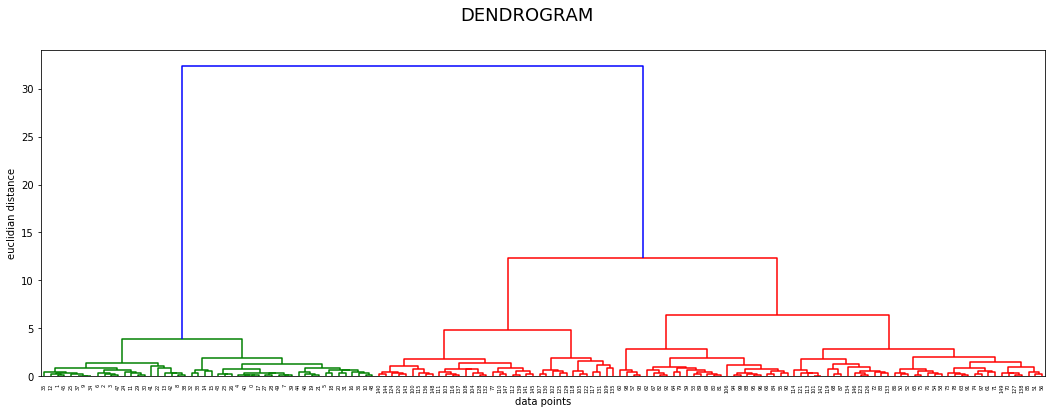

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(features,method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

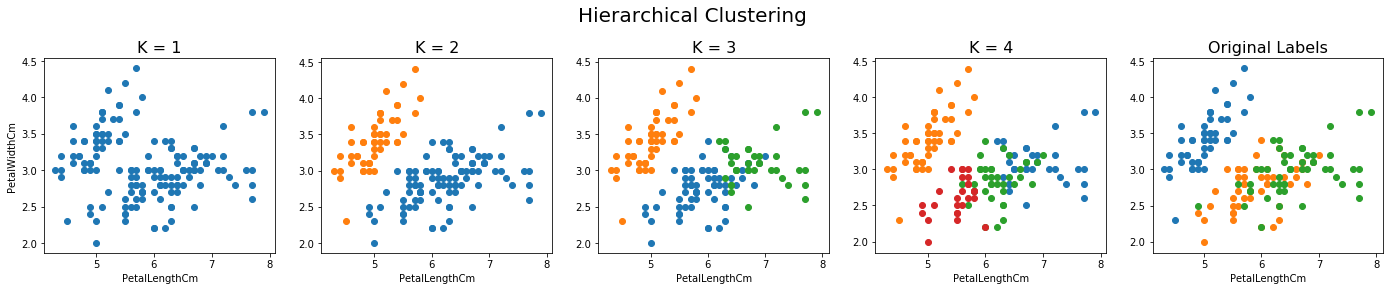

In [22]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.SepalLengthCm,features.SepalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=2)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])

features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=4)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])
plt.scatter(features.SepalLengthCm[features.labels == 3],features.SepalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=3)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])


plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.SepalLengthCm[df.Species == "Iris-setosa"],df.SepalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.SepalLengthCm[df.Species == "Iris-versicolor"],df.SepalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.SepalLengthCm[df.Species == "Iris-virginica"],df.SepalWidthCm[df.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

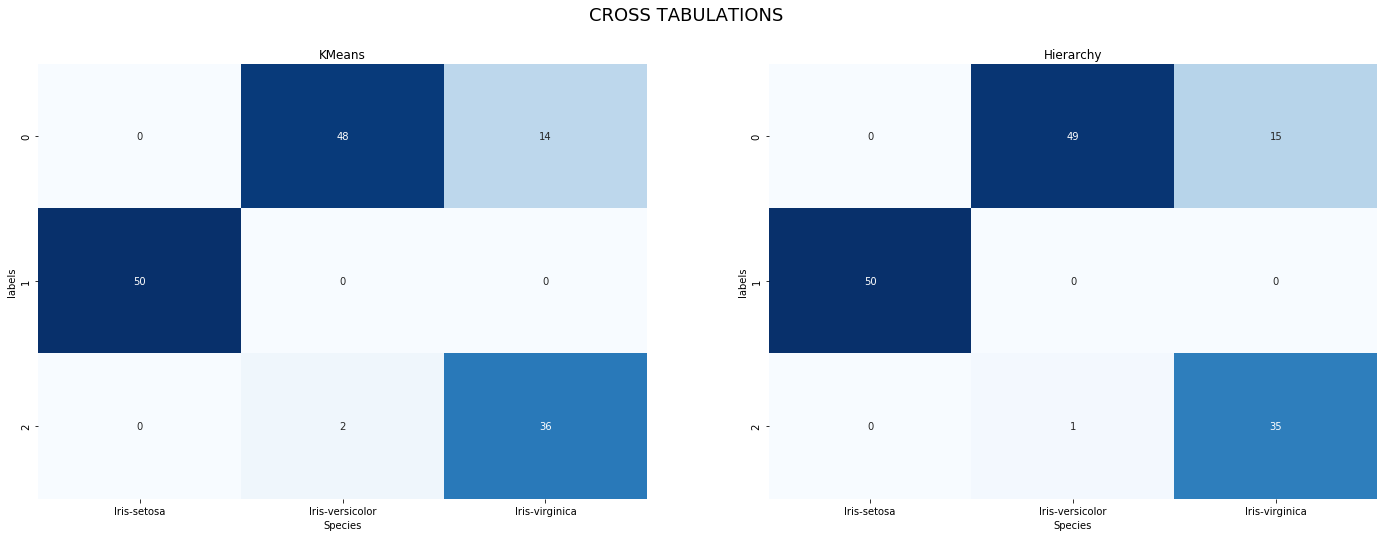

In [23]:
features.drop(["labels"],axis=1,inplace=True)

# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":df['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])


# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(features)

# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'labels':hc_predict,"Species":df['Species']})
ct2 = pd.crosstab(df2['labels'],df2['Species'])


plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchy")

sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()

In [24]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
label = LabelEncoder()

In [26]:
df['Species'] = label.fit_transform(df['Species'])

In [27]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [29]:
iris_matrix = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [30]:
cluster_model = KMeans(n_clusters=3,random_state=100)

In [31]:
cluster_model.fit(iris_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [32]:
cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [33]:
cluster_labels = cluster_model.predict(iris_matrix)

In [34]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

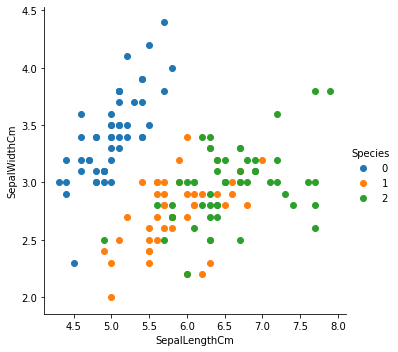

In [35]:
sns.FacetGrid(df,hue = 'Species',size = 5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend();

In [36]:
df2 = df.copy()

In [37]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
df2['Species'] = cluster_labels

In [39]:
df2.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,1


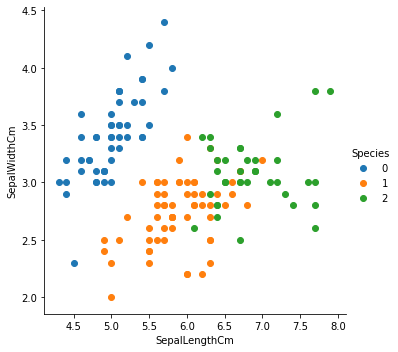

In [40]:
sns.FacetGrid(df2,hue = 'Species',size = 5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend();

In [41]:
sm.accuracy_score(df.Species,cluster_labels)

0.8933333333333333

In [42]:
from sklearn import metrics

In [43]:
metrics.adjusted_rand_score(df.Species,cluster_labels)

0.7302382722834697

In [44]:
sm.confusion_matrix(df.Species,cluster_labels)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)